## Import Libraries and Data

In [1]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/MasterDataset_OT_DoE_06-7-03-23.csv', firstRow=120, lastRow=126)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_060323_S121-126.csv',t_baseline=40,derivNoise=0.005,secDerivNoise=0.001)

## Analyse Water Addition

In [2]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=88s and ended at t=496s; mass=43.75825g
This equals a volume of 43.846m; expected was 43.661mL; error is 0.425%


## Analyse Surfactants

Peak threshold for 1st derivative = 0.00125 g/s and for 2nd derivative = 0.0005 g/s^2


<IPython.core.display.Javascript object>


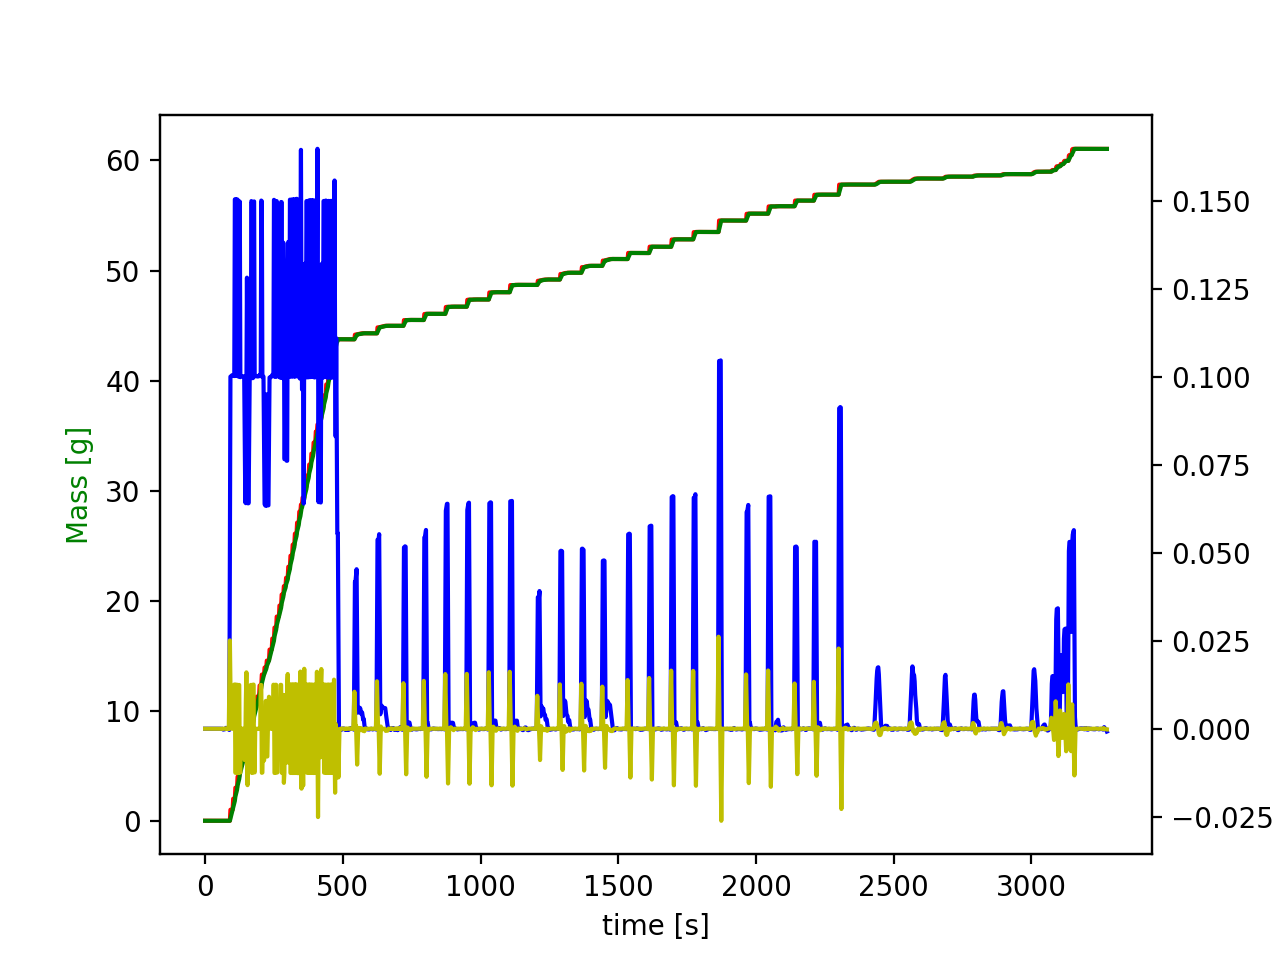

Addition of 0.546g Plantacare 818 detected from 538s to 582s - expected volume = 0.585mL and actual volume = 0.502mL (resulting error is 14.156%)
Addition of 0.684g Plantacare 818 detected from 620s to 666s - expected volume = 0.585mL and actual volume = 0.629mL (resulting error is 7.478%)
Addition of 0.532g Dehyton PK 45 detected from 716s to 746s - expected volume = 0.518mL and actual volume = 0.509mL (resulting error is 1.628%)
Addition of 0.562g Dehyton PK 45 detected from 790s to 812s - expected volume = 0.518mL and actual volume = 0.538mL (resulting error is 4.033%)
Addition of 0.653g Dehyton PK 45 detected from 868s to 904s - expected volume = 0.6mL and actual volume = 0.625mL (resulting error is 4.211%)
Addition of 0.655g Dehyton PK 45 detected from 946s to 984s - expected volume = 0.6mL and actual volume = 0.627mL (resulting error is 4.498%)
Addition of 0.663g Dehyton PK 45 detected from 1026s to 1060s - expected volume = 0.604mL and actual volume = 0.626mL (resulting error is

In [3]:
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant', steps=steps,start_idx=t1,show=True)

## Analyse Polyelectrolytes

Peak threshold for 1st derivative = 0.0015625 g/s and for 2nd derivative = 0.0005468750000000002 g/s^2


<IPython.core.display.Javascript object>


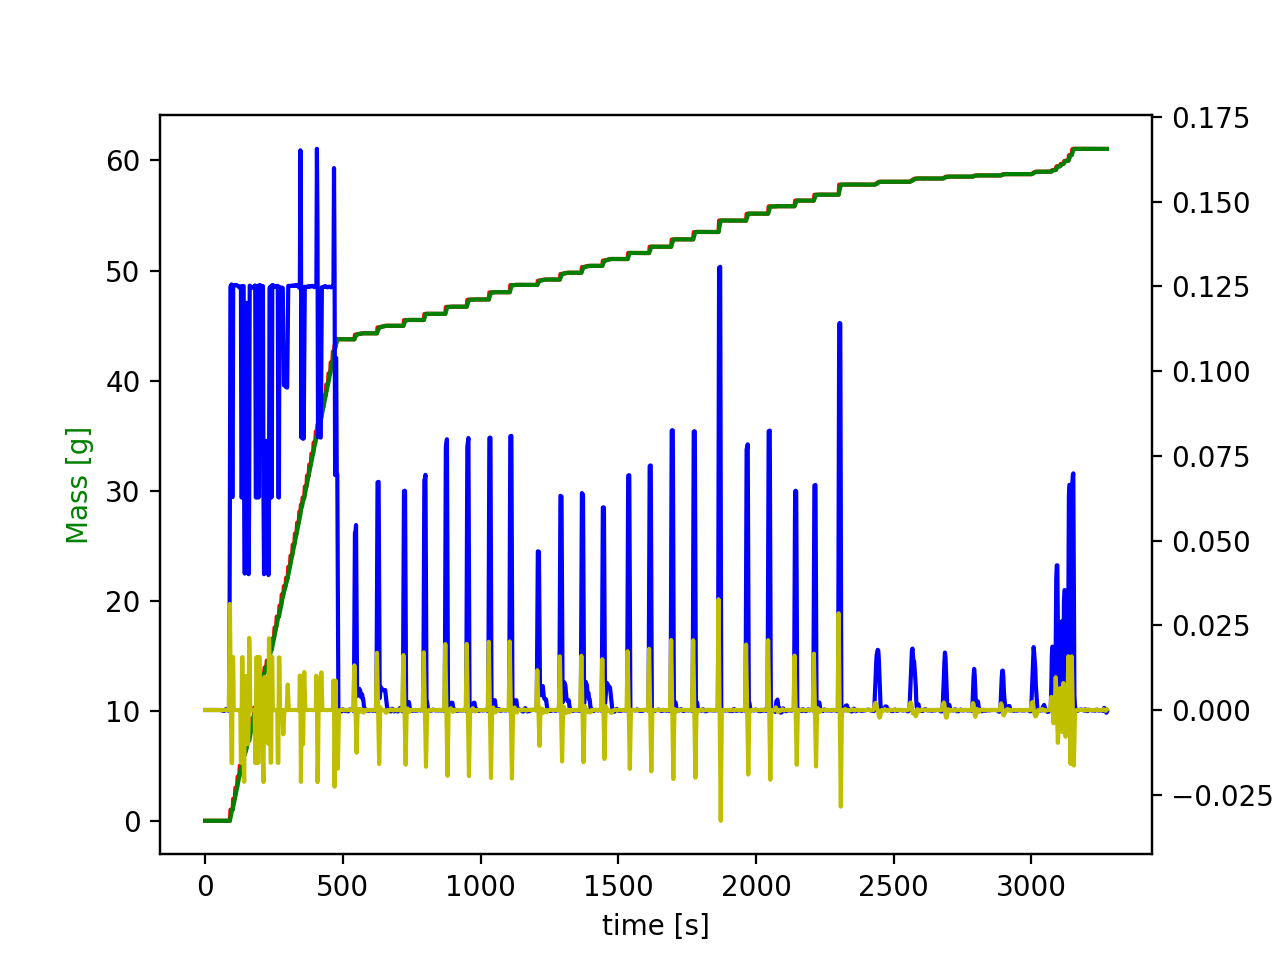

Addition of 0.259g Luviquat Excellence detected from 2428s to 2456s - expected volume = 0.261mL and actual volume = 0.233mL (resulting error is 10.424%)
Addition of 0.299g Luviquat Excellence detected from 2556s to 2594s - expected volume = 0.268mL and actual volume = 0.272mL (resulting error is 1.398%)
Addition of 0.168g Luviquat Excellence detected from 2676s to 2698s - expected volume = 0.148mL and actual volume = 0.153mL (resulting error is 3.144%)
Addition of 0.116g Luviquat Excellence detected from 2784s to 2812s - expected volume = 0.098mL and actual volume = 0.105mL (resulting error is 6.944%)
Addition of 0.117g Luviquat Excellence detected from 2886s to 2908s - expected volume = 0.105mL and actual volume = 0.105mL (resulting error is 0.53%)
Addition of 0.219g Luviquat Excellence detected from 2996s to 3026s - expected volume = 0.202mL and actual volume = 0.197mL (resulting error is 2.444%)


In [4]:
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=5, mergeSens=4, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

## Analyse Thickeners

Peak threshold for 1st derivative = 0.005 g/s and for 2nd derivative = 0.0015625 g/s^2


<IPython.core.display.Javascript object>


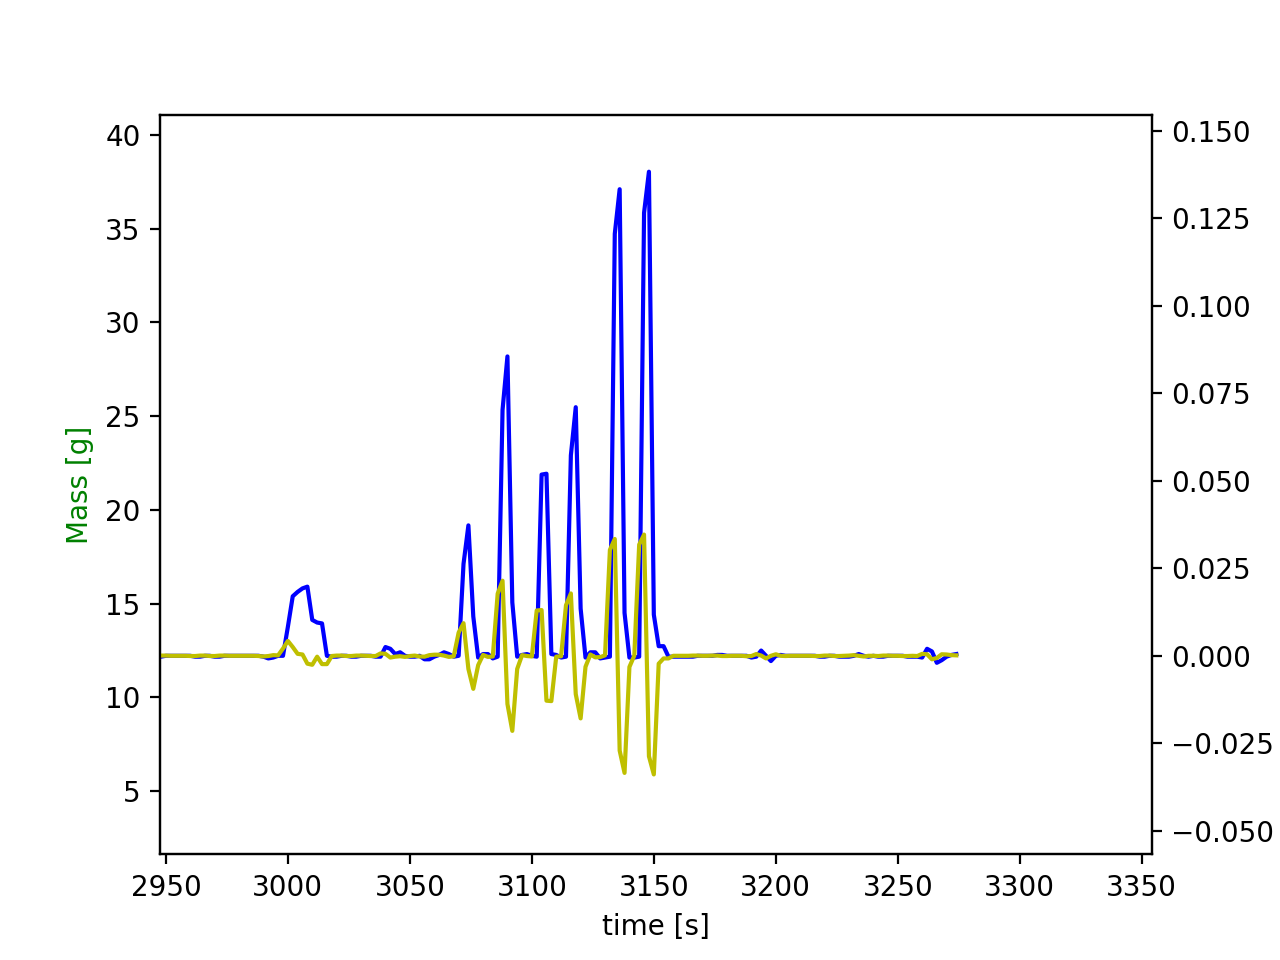

Addition of 0.151g Arlypon TT detected from 3068s to 3082s - expected volume = 0.112mL and actual volume = 0.157mL (resulting error is 39.815%)
Addition of 0.342g Arlypon TT detected from 3084s to 3098s - expected volume = 0.311mL and actual volume = 0.359mL (resulting error is 15.152%)
Addition of 0.209g Arlypon TT detected from 3100s to 3112s - expected volume = 0.108mL and actual volume = 0.218mL (resulting error is 102.427%)
Addition of 0.285g Arlypon TT detected from 3112s to 3126s - expected volume = 0.218mL and actual volume = 0.299mL (resulting error is 37.26%)
Addition of 0.526g Arlypon TT detected from 3130s to 3144s - expected volume = 0.507mL and actual volume = 0.541mL (resulting error is 6.579%)
Addition of 0.562g Arlypon TT detected from 3144s to 3156s - expected volume = 0.509mL and actual volume = 0.581mL (resulting error is 14.228%)


In [5]:
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=5, mergeSens=1, specType='thickener',steps=steps,start_idx=t3,show=True)

## Consolidate results and create output

In [6]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_060323_S121-S126.csv', index=False)
actualMassFractions

,ID,Texapon SB 3 KC,Plantapon ACG 50,Plantapon LC 7,Plantacare 818,Plantacare 2000,Dehyton MC,Dehyton PK 45,Dehyton ML,Dehyton AB 30,Plantapon Amino SCG-L,Plantapon Amino KG-L,Dehyquart A-CA,Luviquat Excellence,Dehyquart CC6,Dehyquart CC7 Benz,Salcare Super 7,Arlypon F,Arlypon TT
120,121.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,11.110272,0.0,12.972848,0.000000,2.556597,0.0,0.0,0.0,0.0,1.491245
121,122.0,0.0,0.0,0.0,0.00000,0.0,0.0,10.833398,11.017586,0.000000,0.0,0.000000,0.000000,2.962103,0.0,0.0,0.0,0.0,3.386675
122,123.0,0.0,0.0,0.0,0.00000,0.0,0.0,12.525976,12.000471,0.000000,0.0,0.000000,0.000000,1.609300,0.0,0.0,0.0,0.0,1.995771
123,124.0,0.0,0.0,0.0,12.01613,0.0,0.0,0.000000,0.000000,13.182099,0.0,0.000000,0.000000,1.127885,0.0,0.0,0.0,0.0,2.787976
124,125.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,10.395961,0.0,0.000000,10.547204,1.167904,0.0,0.0,0.0,0.0,5.238776
125,126.0,0.0,0.0,0.0,0.00000,0.0,0.0,13.082717,0.000000,0.000000,0.0,0.000000,8.947867,2.157356,0.0,0.0,0.0,0.0,5.523617
